# Canonical Correlation Analysis (CCA) with California Housing Dataset

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cross_decomposition import CCA


In [19]:
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing(as_frame=True)
df = data.frame
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [20]:
df.shape

(20640, 9)

## Exploratory Data Analysis (EDA)


In [21]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


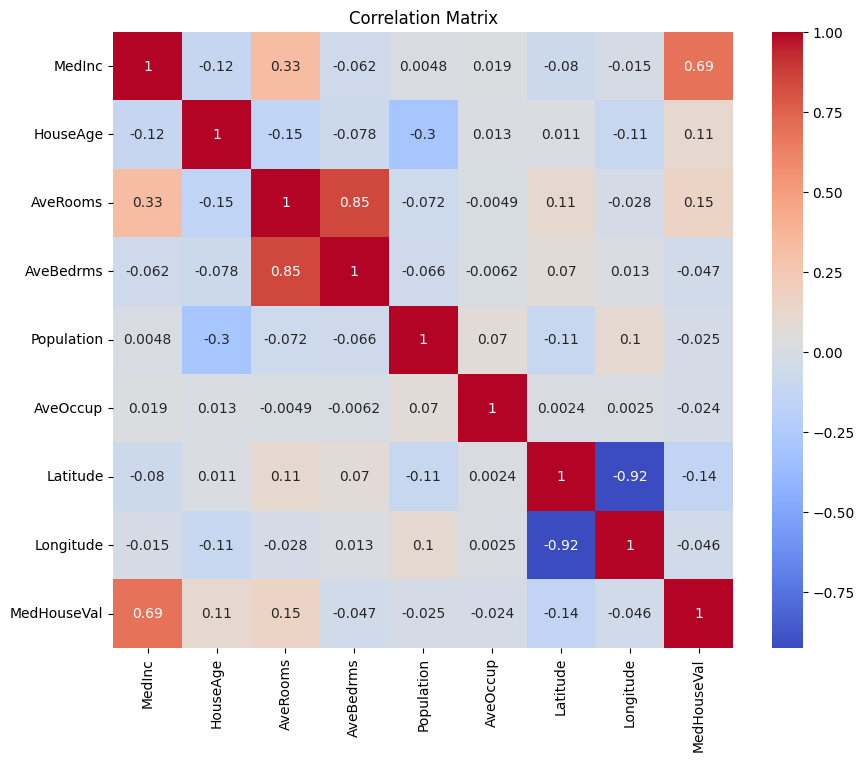

In [22]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## Splitting the dataset into two views
We'll split the dataset into two views:
- **View 1**: Includes `MedInc`, `HouseAge`, `AveRooms`, and `AveBedrms`
- **View 2**: Includes `Population`, `AveOccup`, `Latitude`, and `Longitude`

In [23]:
view1 = df[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms']]
view2 = df[['Population', 'AveOccup', 'Latitude', 'Longitude']]

scaler = StandardScaler()
view1_scaled = scaler.fit_transform(view1)
view2_scaled = scaler.fit_transform(view2)

## Applying Canonical Correlation Analysis (CCA)
We'll use `CCA` from `sklearn` to find the linear relationships between the two views.

In [25]:
subset_size = 500  # Define the size of the subset
view1_subset = view1_scaled[:subset_size]
view2_subset = view2_scaled[:subset_size]

# Perform Canonical Correlation Analysis
cca = CCA(n_components=2)
view1_c, view2_c = cca.fit_transform(view1_subset, view2_subset)

corr = np.corrcoef(view1_c, view2_c)[0,1]
# Display the canonical correlations
print(f'Canonical Correlations: {corr}')

Canonical Correlations: 1.0


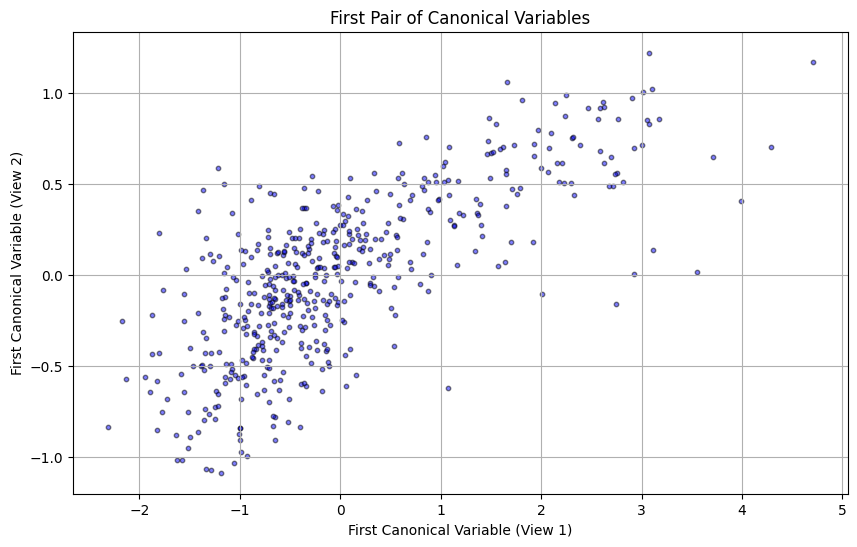

In [26]:
# Plotting the first pair of canonical variables
plt.figure(figsize=(10, 6))
plt.scatter(view1_c[:, 0], view2_c[:, 0], c='blue', edgecolors='k', s=10, alpha=0.5)
plt.xlabel('First Canonical Variable (View 1)')
plt.ylabel('First Canonical Variable (View 2)')
plt.title('First Pair of Canonical Variables')
plt.grid(True)
plt.show()